# Design and Development of Compact CPW Fed Band-Notched Antenna for UWB Application using Machine learning

## Data Fields:

d -- Width of L Strip in Proposed Antenna <br/>
h -- Horizontal Length of L Strip in Proposed Antenna <br/>
l -- Vertical Length of L Strip in Proposed Antenna <br/>
Freq --- Frequency In GHz <br/>
dB -- Result which we got from Simulation of Antenna Using HFSS

## Import Data From Drive For Collabe

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Import Dataset

In [3]:
Dataset = pd.read_excel('Main_dataset.xlsx')
Dataset.head()

,d,h,l,Freq,dB
0,0.2,-7.0,7.0,2.9,-3.195070
1,0.2,-7.0,7.2,2.9,-3.324770
2,0.2,-7.0,7.4,2.9,-3.456933
3,0.2,-7.0,7.6,2.9,-2.708674
4,0.2,-7.0,7.8,2.9,-4.193131


## Data Shape

In [4]:
Dataset.shape

(202608, 5)

## Check For Null Values

In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202608 entries, 0 to 202607
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   d       202608 non-null  float64
 1   h       202608 non-null  float64
 2   l       202608 non-null  float64
 3   Freq    202608 non-null  float64
 4   dB      202608 non-null  float64
dtypes: float64(5)
memory usage: 7.7 MB


## Univariate Measures

In [6]:
Dataset.describe()

,d,h,l,Freq,dB
count,202608.00000,202608.000000,202608.000000,202608.000000,202608.000000
mean,0.30000,-5.000000,8.500000,12.250000,-13.614835
std,0.08165,1.211063,0.921957,5.425162,3.599592
min,0.20000,-7.000000,7.000000,2.900000,-44.732142
25%,0.20000,-6.000000,7.750000,7.575000,-16.049837
50%,0.30000,-5.000000,8.500000,12.250000,-13.943070
75%,0.40000,-4.000000,9.250000,16.925000,-11.231658
max,0.40000,-3.000000,10.000000,21.600000,25.582638


## Visualize the Data

Text(0, 0.5, 'dB')

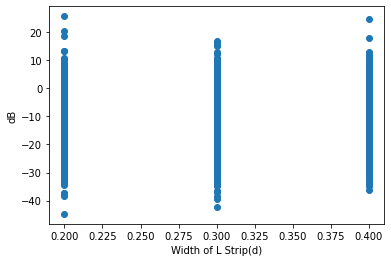

In [7]:
plt.scatter(x = 'd', y = 'dB', data = Dataset)
plt.xlabel('Width of L Strip(d)')
plt.ylabel('dB')

Text(0, 0.5, 'dB')

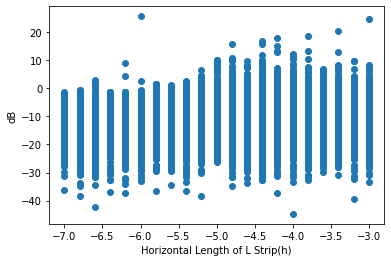

In [8]:
plt.scatter(x = 'h', y = 'dB', data = Dataset)
plt.xlabel('Horizontal Length of L Strip(h)')
plt.ylabel('dB')

Text(0, 0.5, 'dB')

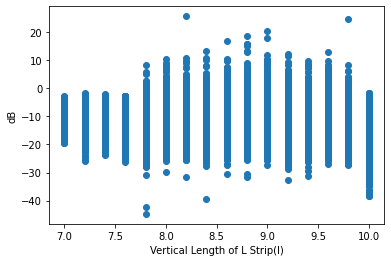

In [9]:
plt.scatter(x = 'l', y = 'dB', data = Dataset)
plt.xlabel('Vertical Length of L Strip(l)')
plt.ylabel('dB')

Text(0, 0.5, 'dB')

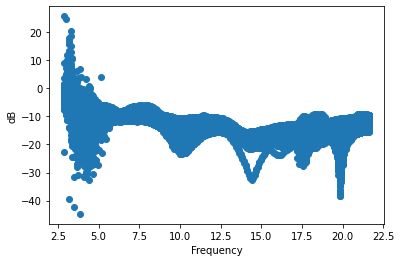

In [10]:
plt.scatter(x = 'Freq', y = 'dB', data = Dataset)
plt.xlabel('Frequency')
plt.ylabel('dB')

<AxesSubplot:xlabel='l', ylabel='h'>

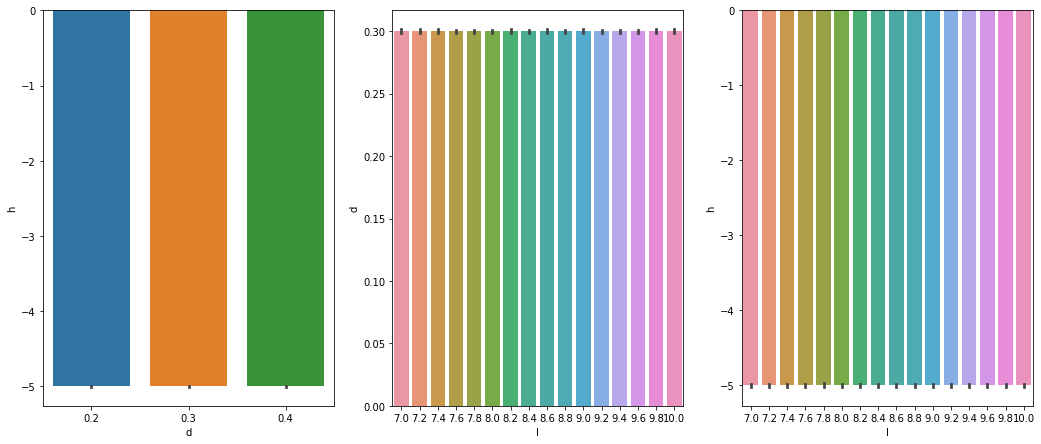

In [11]:
plt.figure(figsize=[24,16])
plt.subplot(241)
sns.barplot(x = 'd', y = 'h', data = Dataset)
plt.subplot(242)
sns.barplot(x = 'l', y = 'd', data = Dataset)
plt.subplot(243)
sns.barplot(x = 'l', y = 'h', data = Dataset)

<AxesSubplot:xlabel='h', ylabel='l'>

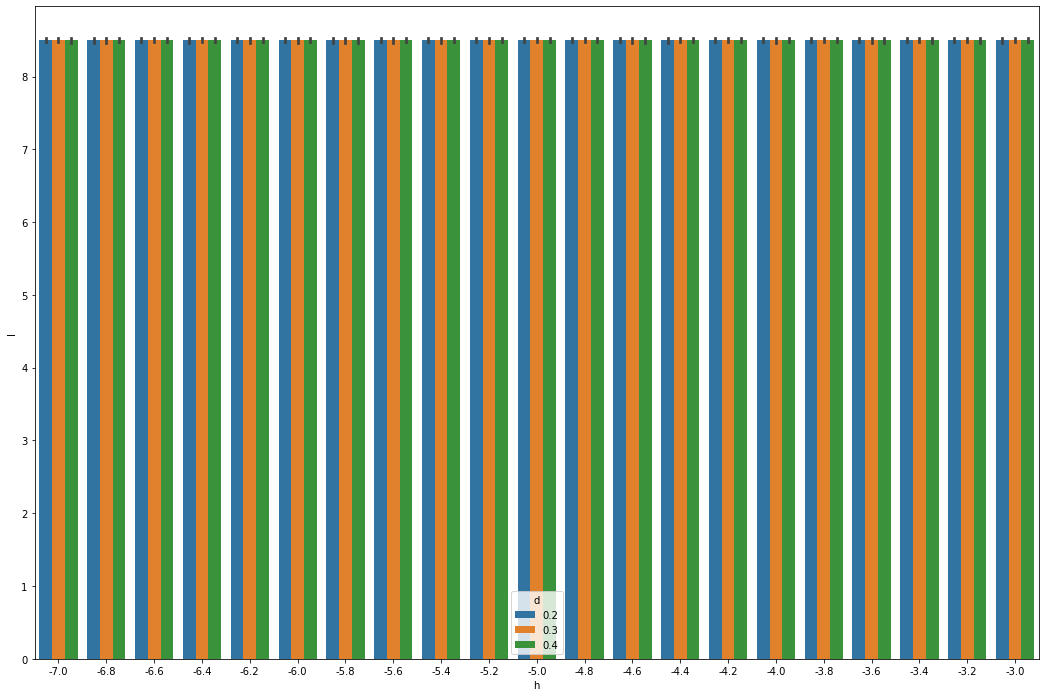

In [12]:
plt.figure(figsize=[18,12])
sns.barplot(x = 'h',y= 'l', hue = 'd', data = Dataset)

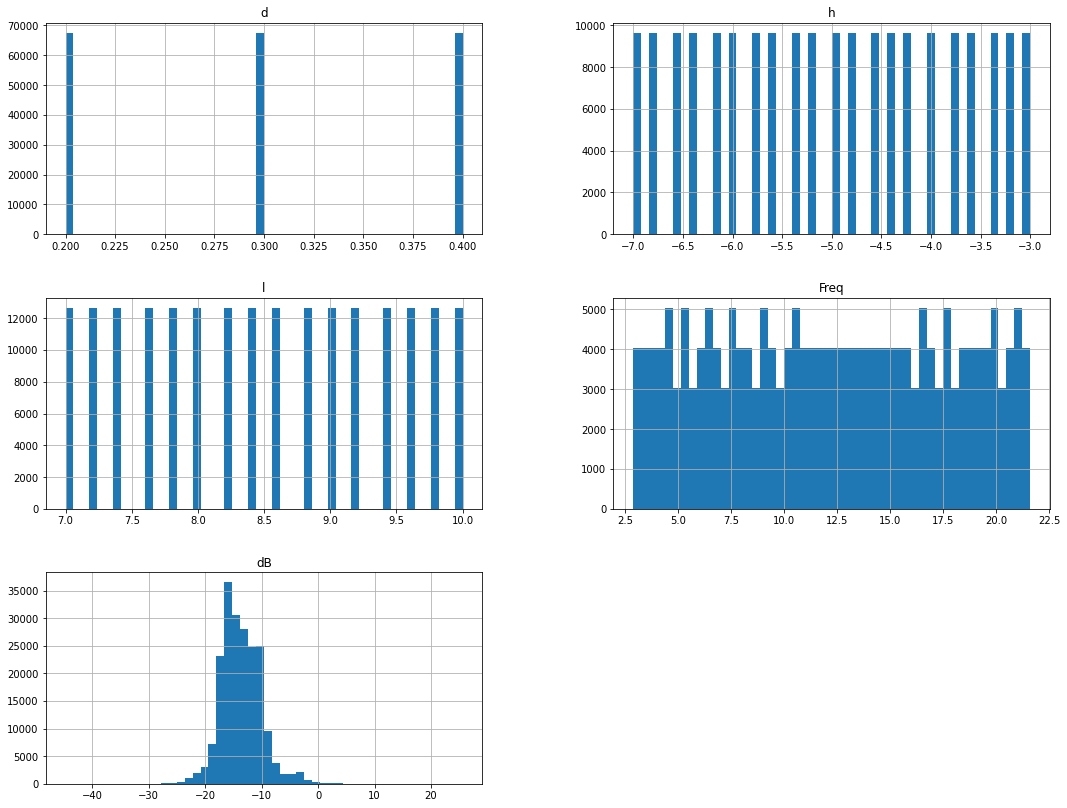

In [13]:
Dataset.hist(bins=50, figsize=(18,14))
plt.show()

## Check For Correlation

In [14]:
data_correlation = Dataset.corr()
data_correlation

,d,h,l,Freq,dB
d,1.000000e+00,4.853454e-17,-3.530462e-17,-8.188475e-15,-0.011987
h,4.853454e-17,1.000000e+00,-8.031224e-16,-6.428768e-14,0.019175
l,-3.530462e-17,-8.031224e-16,1.000000e+00,-1.566157e-13,-0.025573
Freq,-8.188475e-15,-6.428768e-14,-1.566157e-13,1.000000e+00,-0.516858
dB,-1.198681e-02,1.917502e-02,-2.557281e-02,-5.168579e-01,1.000000


## Heatmap

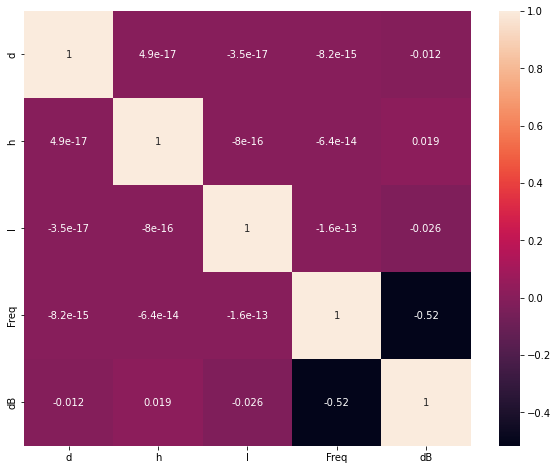

In [15]:
plt.subplots(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True)
plt.show()

## Build Model Function
Creating a Function for building Models

### Linear Regression
Creating a function for Linear Regression Model fit on the data

In [16]:
def Linear_Regression(x_train, y_train):
    print("Linear Regression: ")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

### Lasso Regression
Creating a function for Lasso Regression Model fit on the data

In [17]:
def Lasso_Regression(x_train, y_train):
    print("Lasso Regression: ")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression

### Ridge Regression
Creating a function for Ridge Regression Model fit on the data

In [18]:
def Ridge_Regression(x_train, y_train):
    print("Ridge Regression: ")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

### Sochastic Gradient Descent Regression

Creating a function for Sochastic Gradient Descent Regression Model fit on the data

In [19]:
def SGD_Regression(x_train, y_train):
    print("SGD Regression: ")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression

### Multilayer Preceptron Regresson

Creating a function for MLP Regressor Neural Network to fit the data. 3 Hidden layers, with 13 neurons each.

In [20]:
def MLP_Regression(x_train, y_train):
    print("MLP Regressor: ")
    mlp_regressor = MLPRegressor(activation='relu', hidden_layer_sizes=(13,13,13), solver='lbfgs', verbose = True, max_iter= 20000)
    mlp_regressor.fit(x_train, y_train)
    return mlp_regressor

### Support Vector Regression

Creating a function for Support Vector Regression Model fit on the data

In [21]:
def SVR_Regression(x_train, y_train):
    print("Support Vector Regressor: ")
    svr_regressor = SVR(kernel = 'rbf' , degree= 3)
    svr_regressor.fit(x_train, y_train)
    return svr_regressor

### Decision Tree Regression

Creating a function for Decision Tree Regression Model fit on the data

In [22]:
def DT_Regression(x_train, y_train):
    print("Decision Tree Regressor: ")
    dt_regressor = DecisionTreeRegressor()
    dt_regressor.fit(x_train, y_train)
    return dt_regressor

### Random Forest Regression

Creating a function for Random Forest Regression Model fit on the data

In [23]:
def RF_Regression(x_train, y_train):
    print("Random Forest Regressor: ")
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(x_train, y_train)
    return rf_regressor

### Gradient Boosting Regression

Creating a function for Gradient Boosting Regression Model fit on the data

In [24]:
def GB_Regression(x_train, y_train):
    print("Gradient Boosting Regressor: ")
    gb_regressor = GradientBoostingRegressor()
    gb_regressor.fit(x_train, y_train)
    return gb_regressor

### Light Gradient Boosting Regression

Creating a function for Light Gradient Boosting Regression Model fit on the data

In [25]:
def LGBM_Regression(x_train, y_train):
    print("LGBM Regressor: ")
    lgbm_regressor = LGBMRegressor()
    lgbm_regressor.fit(x_train, y_train)
    return lgbm_regressor

### Extreme Gradient Boosting Regression

Creating a function for Extreme Gradient Boosting Regression Model fit on the data

In [26]:
def XGB_Regression(x_train, y_train):
    print("XGB Regressor: ")
    xgb_regressor = XGBRegressor()
    xgb_regressor.fit(x_train, y_train)
    return xgb_regressor

## Build and Train Model Function
Creating a Function for building, training and evaluating the model by using the train test split method where X is all variables but the median value and Y is target name = sales. The function preprocesses the data using standard scaler, trains the model ans print out the r2 score for accuracy, with the predicted values vs actual values.

In [27]:
# data means dataset name and reg_fn means model function name
def build_and_train_model(data, reg_fn):
    X = Dataset.drop("dB", axis=1)
    Y = Dataset["dB"]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)
    
    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training score: ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    mse = mean_squared_error(y_test, y_pred)
    print("mse value : ", mse)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    
    plt.figure(figsize=(10, 8))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.ylabel("db[s(1,1)]")
    plt.legend()
    plt.show()

    return{'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred, 'sample' : df_y.sample(10)
            }

### Linear Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Linear Regression: 
Training score:  0.26709397330698903
Testing Score :  0.2731473665286712
mse value :  9.418456177958907
           y_test     y_pred
180280 -20.339254 -16.091412
69606  -10.618735 -12.642881
4543    -5.315716 -10.688372
199705 -10.063013 -16.869258
128727 -18.027606 -14.475251
142086 -16.441382 -14.695512
100141 -12.846813 -13.669112
139689 -15.894141 -14.781595
124803 -17.023066 -14.128112
126892 -16.897614 -14.408567


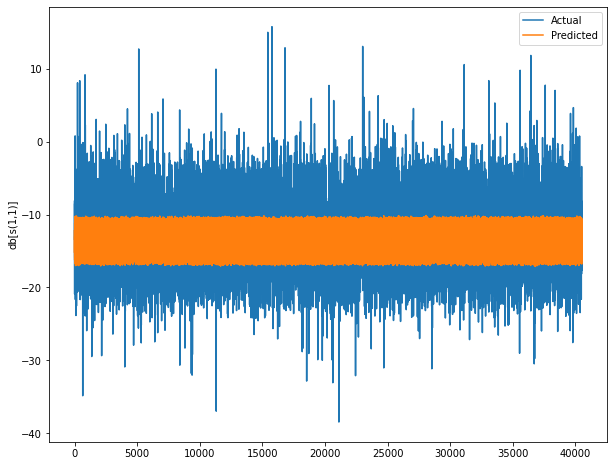

In [28]:
Linear_regression = build_and_train_model(Dataset, Linear_Regression)

### Lasso Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Lasso Regression: 
Training score:  0.2660580957829546
Testing Score :  0.26337872085241176
mse value :  9.488619316185225
           y_test     y_pred
118162 -18.516332 -14.113349
183844 -21.814023 -16.035612
17148  -14.065060 -11.156023
201829 -10.873767 -16.567930
155674 -14.990181 -15.207560
184347 -22.803543 -16.035612
150705 -16.531167 -15.059694
16521  -23.720756 -11.126450
193678 -12.729720 -16.331344
66048  -10.571191 -12.575540


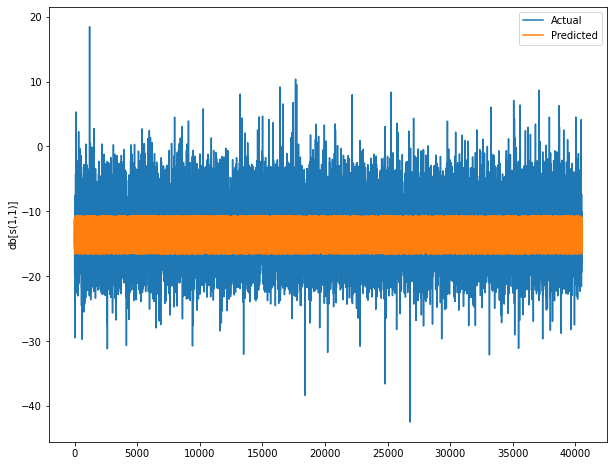

In [29]:
Lasso_regression = build_and_train_model(Dataset, Lasso_Regression)

### Ridge Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Ridge Regression: 
Training score:  0.2683123784894029
Testing Score :  0.2682630855191035
mse value :  9.341625834991962
           y_test     y_pred
137787 -15.383384 -14.791119
191997 -13.999898 -16.679115
151051 -16.405060 -15.228567
7388    -6.172304 -10.817042
74063  -16.772926 -12.958953
9271   -12.060707 -10.698270
62843  -11.089985 -12.441723
13788  -21.221676 -10.803531
33393   -9.010373 -11.489208
148408 -18.186105 -15.261545


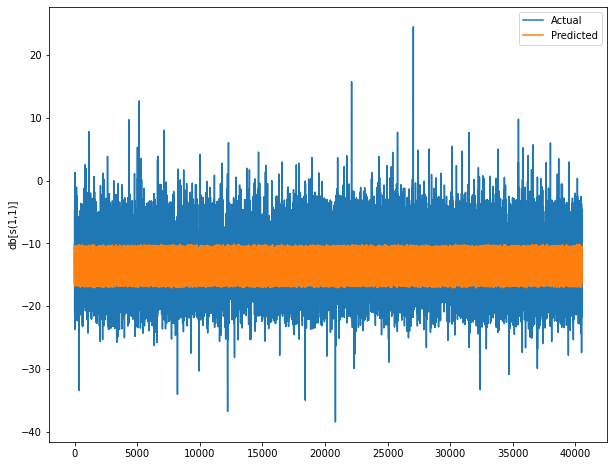

In [30]:
Ridge_regression = build_and_train_model(Dataset, Ridge_Regression)

### Sochastic Gradient Descent Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

SGD Regression: 
Training score:  0.24565842099740853
Testing Score :  0.24481409543829336
mse value :  9.884884160761338
           y_test     y_pred
28770   -8.675345 -11.479787
69057  -13.305117 -12.917397
11152  -17.889886 -10.974178
175740 -15.603653 -16.808717
103235 -15.519631 -14.176829
117459 -16.577159 -14.525708
52515   -7.113819 -12.410709
76648  -19.900157 -13.488952
136366 -16.013096 -15.618763
121967 -16.207228 -14.917431


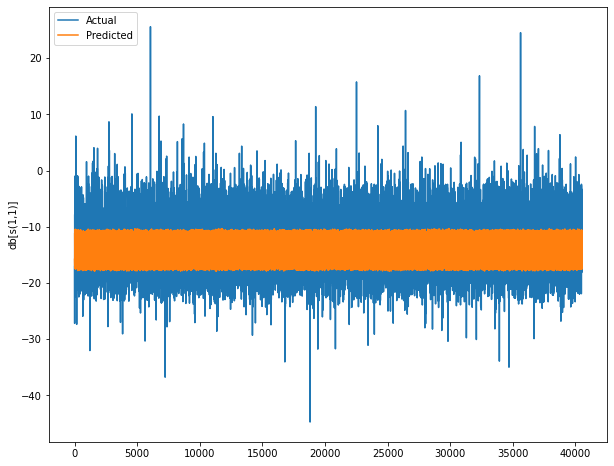

In [31]:
SGD_regression = build_and_train_model(Dataset, SGD_Regression)

### Multilayer Preceptron Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

MLP Regressor: 
Training score:  0.648650432815338
Testing Score :  0.6557265301558399
           y_test     y_pred
192067 -16.372348 -14.516872
16603  -19.585912 -14.980920
136014 -16.213687 -16.148998
197013 -11.714420 -14.303969
12916   -6.272638 -13.394527
187524 -19.026136 -14.627593
73196  -15.642963 -15.154067
39043   -8.482247  -8.461531
122936 -17.287639 -16.757837
13291  -17.665706 -15.669094


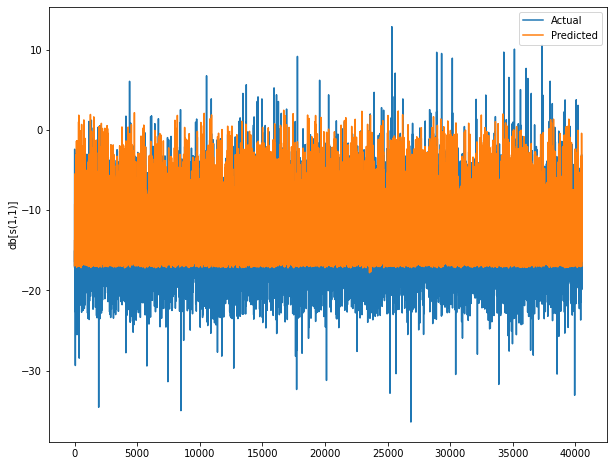

In [32]:
MLP_regression = build_and_train_model(Dataset, MLP_Regression)

### Support Vector Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Support Vector Regressor: 
Training score:  0.35112485202102683
Testing Score :  0.34889415691742887
           y_test     y_pred
100373 -14.597876 -14.806218
109747 -15.582740 -15.658978
99914  -12.450080 -14.570763
26852   -9.394215  -9.429684
37965  -11.026335 -11.071036
1257    -2.219206 -10.346378
46078  -10.823156 -11.588662
178668 -17.690572 -13.622253
92396  -13.821457 -14.542595
166729 -11.817873 -14.851794


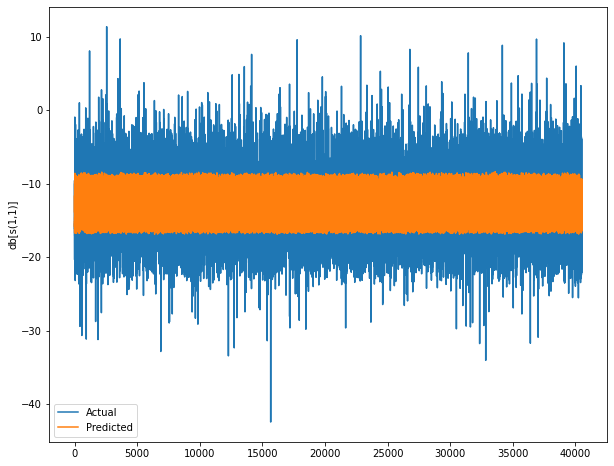

In [33]:
SVR_regression = build_and_train_model(Dataset, SVR_Regression)

### Decision Tree Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Decision Tree Regressor: 
Training score:  1.0
Testing Score :  0.928180324394331
mse value :  0.9327981317215205
           y_test     y_pred
15816  -17.100347 -15.820765
190511 -14.870461 -14.263619
45014   -9.985170  -9.977743
134124 -14.982301 -15.044009
135004 -16.418430 -16.490023
172624 -16.613885 -16.613885
134870 -15.458680 -15.522438
3951    -4.720178  -5.382661
28172  -10.738437 -11.640044
28962   -8.675345  -8.675345


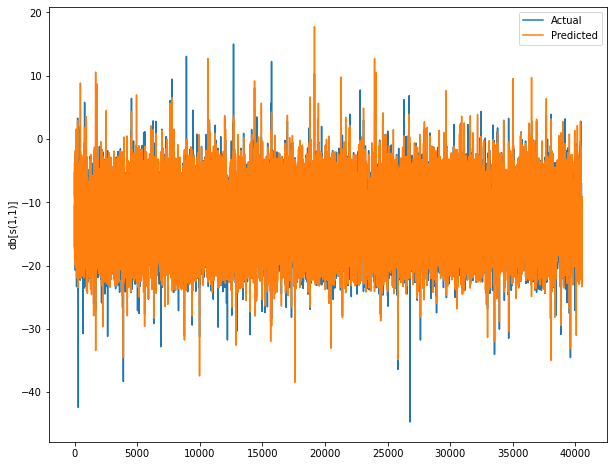

In [34]:
DT_regression = build_and_train_model(Dataset, DT_Regression)

### Random Forest Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Random Forest Regressor: 
Training score:  0.9943236319923973
Testing Score :  0.9609644940416198
mse value :  0.5086357221873643
           y_test     y_pred
164462 -12.125622 -12.140662
58232  -11.037823 -11.106350
67909  -11.752965 -11.872913
156122 -14.326936 -13.821599
31082  -10.822181 -11.123099
201460 -10.913201 -10.922364
13396  -19.863433 -18.540098
65269  -12.930051 -12.767848
16677  -18.874441 -18.743161
11444  -14.451080 -15.750661


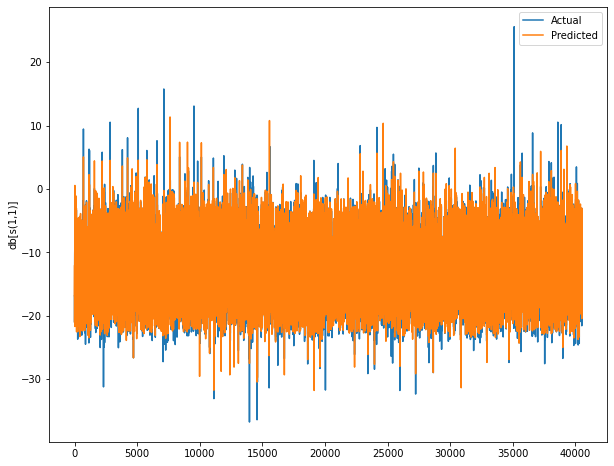

In [35]:
RF_regression = build_and_train_model(Dataset, RF_Regression)

### Gradient Boosting Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Gradient Boosting Regressor: 
Training score:  0.8447747031457739
Testing Score :  0.8379161698924295
mse value :  2.101887656412752
           y_test     y_pred
35494  -10.224177 -10.262987
177866 -17.647367 -16.969363
59060   -9.995017  -9.719143
141995 -16.438770 -16.346700
85800  -17.793207 -15.271867
61752  -11.194089 -11.265957
130898 -15.050605 -16.124911
92062  -14.526782 -14.048301
23249   -9.571113  -9.953934
18161  -11.676091 -12.889459


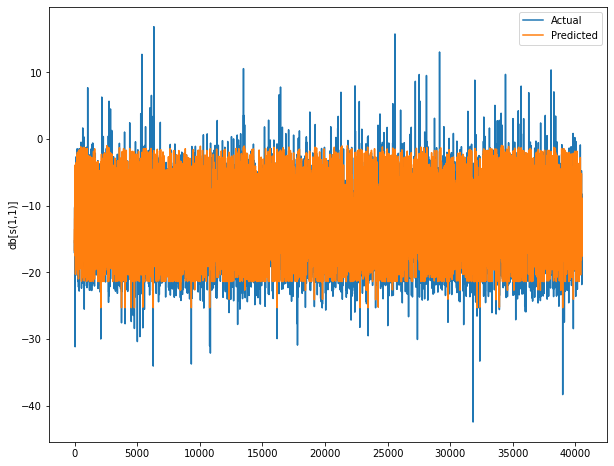

In [36]:
GB_regression = build_and_train_model(Dataset, GB_Regression)

### Light Gradient Boosting Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

LGBM Regressor: 
Training score:  0.9215981528237825
Testing Score :  0.9219268833404702
mse value :  1.0102933593392553
           y_test     y_pred
97069  -11.728115 -12.724651
130971 -16.014363 -16.034533
78637  -17.662505 -17.077760
52679  -10.419132 -10.123497
144880 -17.585007 -17.278070
167745 -16.157948 -15.612670
145424 -17.993380 -17.037447
35920   -9.195706  -8.945845
27756  -11.015853 -11.109790
156903 -14.148328 -14.273239


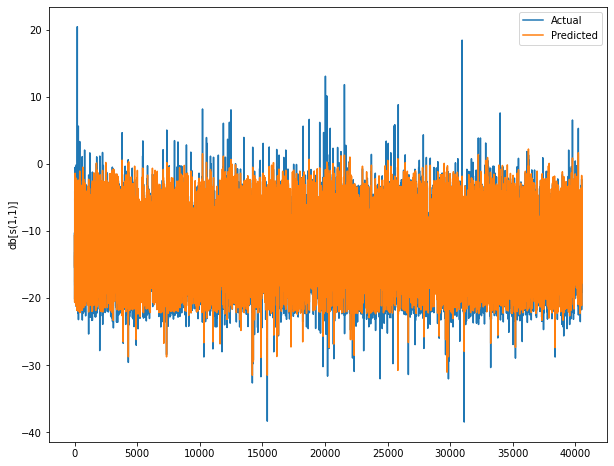

In [37]:
LGBM_regression = build_and_train_model(Dataset, LGBM_Regression)

### Extreme Gradient Boosting Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 2 inputs as needed: data file and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

XGB Regressor: 
Training score:  0.9452966171322393
Testing Score :  0.9397297667650584
mse value :  0.794262780151568
           y_test     y_pred
182230 -20.137724 -20.528673
5959    -9.815001  -8.315258
44355   -7.786183  -8.211823
176350 -16.324299 -16.337965
24290   -9.362059  -9.134952
37041   -9.031010  -8.953558
149183 -14.925758 -15.319489
46630   -9.614470 -10.038440
78867  -18.286376 -16.464382
11374  -14.064936 -14.262037


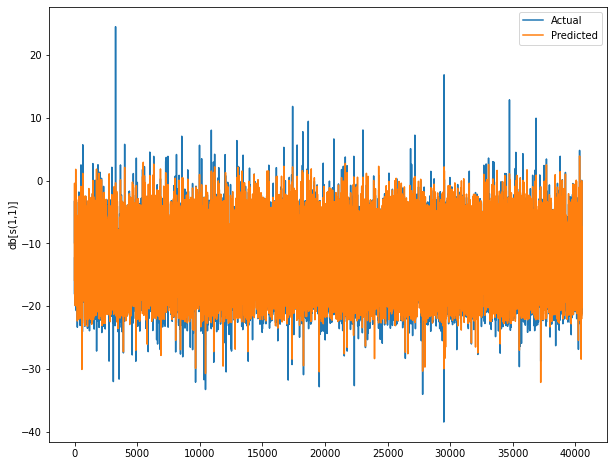

In [38]:
XGB_regression = build_and_train_model(Dataset, XGB_Regression)

## Spliting Dataset Into Training And Testing Set

In [39]:
X = Dataset.drop("dB", axis=1)
Y = Dataset["dB"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

## Parameter Tunning For RandomForest Model

In [40]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



In [41]:
from sklearn.ensemble import RandomForestRegressor

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=100; total time=  12.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=100; total time=  11.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=100; total time=  11.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=200; total time=  23.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=200; total time=  24.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=200; total time=  24.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=300; total time=  37.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=300; total time=  35.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=300; total time=  35.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=1000; total time= 2.6min
[CV] END bootstrap

[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=200; total time=  26.5s
[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=200; total time=  26.7s
[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=300; total time=  40.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=300; total time=  40.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=300; total time=  40.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=1000; total time= 2.7min
[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=1000; total time= 2.8min
[CV] END bootstrap=True, max_depth=110, max_features=3, n_estimators=1000; total time= 2.7min


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [42]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 110, 'max_features': 2, 'n_estimators': 1000}

In [43]:
# grid_search.cv_results_ for results
# pd.DataFrame for converge into dataframe
result_dataframe = pd.DataFrame(grid_search.cv_results_)
result_dataframe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.525700,0.398322,1.464100,0.072802,True,80,2,100,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.966702,0.965989,0.966718,0.966470,0.000340,14
1,21.216015,0.071750,2.993252,0.171407,True,80,2,200,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.966594,0.966604,0.967647,0.966948,0.000494,10
2,31.304765,0.486260,4.667512,0.471607,True,80,2,300,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.966820,0.966496,0.967442,0.966919,0.000393,11
3,105.934383,1.935724,52.317115,1.037634,True,80,2,1000,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.967266,0.966661,0.967687,0.967205,0.000421,3
4,12.795681,0.251643,1.350113,0.062834,True,80,3,100,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.957666,0.958083,0.959223,0.958324,0.000658,27
5,26.886113,0.172468,2.984355,0.133241,True,80,3,200,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.958214,0.958185,0.958998,0.958465,0.000376,25
6,38.588158,0.516900,4.216396,0.250537,True,80,3,300,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.958306,0.958515,0.959144,0.958655,0.000356,19
7,129.027408,0.619053,47.694867,0.812333,True,80,3,1000,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.958261,0.958563,0.959295,0.958706,0.000434,17
8,10.371553,0.311373,1.504432,0.225104,True,90,2,100,"{'bootstrap': True, 'max_depth': 90, 'max_feat...",0.966434,0.965942,0.966654,0.966343,0.000298,15
9,21.560189,1.004146,2.985694,0.177023,True,90,2,200,"{'bootstrap': True, 'max_depth': 90, 'max_feat...",0.967406,0.966832,0.966687,0.966975,0.000310,9


In [44]:
result_dataframe[['param_max_depth','param_max_features','param_n_estimators','mean_test_score']]

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,80,2,100,0.966470
1,80,2,200,0.966948
2,80,2,300,0.966919
3,80,2,1000,0.967205
4,80,3,100,0.958324
5,80,3,200,0.958465
6,80,3,300,0.958655
7,80,3,1000,0.958706
8,90,2,100,0.966343
9,90,2,200,0.966975


In [45]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=110, max_features=2, n_estimators=1000)

In [46]:
print(dir(grid_search),'\n')
print('best score = ',grid_search.best_score_)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_is_fitted', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_validate_data', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'inverse_transform', 'multimetric_', 'n_features_in_', 'n_jobs', 'n_splits_', 'param_grid', 'pre_dispatch', 'predict', 'predict_log_pro

## Best Random Forest Regressor Model

best parameter:- <br/>
{'bootstrap': True, 'max_depth': 110, 'max_features': 2, 'n_estimators': 1000}

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap= True, max_depth= 90, max_features= 2, n_estimators= 1000)
rf.fit(x_train , y_train)

RandomForestRegressor(max_depth=90, max_features=2, n_estimators=1000)

Training score RandomForestRegressor with n_estimators = 1000:  0.9962801137517103
Testing Score RandomForestRegressor with n_estimators = 1000:  0.9713175385261987
mse value :  0.3729638096185868


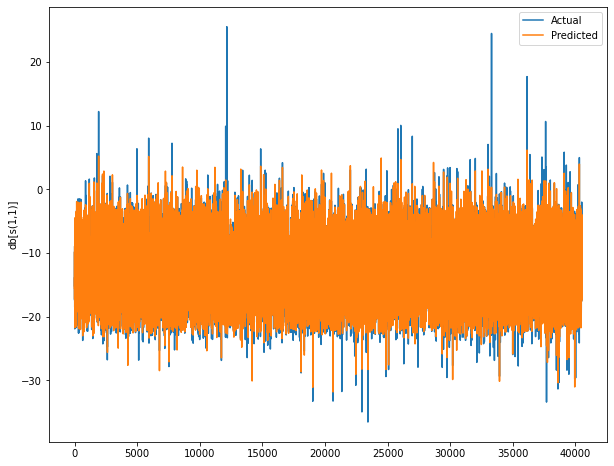

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = rf.score(x_train, y_train)
print("Training score RandomForestRegressor with n_estimators = 1000: ", score)

y_pred = rf.predict(x_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score RandomForestRegressor with n_estimators = 1000: ", r_score)

mse = mean_squared_error(y_test, y_pred)
print("mse value : ", mse)

plt.figure(figsize=(10, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("db[s(1,1)]")
plt.legend()
plt.show()

## KNN model

In [49]:
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1,31)
df = pd.DataFrame(columns = ['K', 'MSE','train_acc','test_acc'])
for K in k_range:
    knn = KNeighborsRegressor(n_neighbors = K)
    knn.fit(x_train ,y_train)
    train_accuracies = knn.score(x_train,y_train)
    accuracies = r2_score(y_test, knn.predict(x_test))
    mse = mean_squared_error(y_test,  knn.predict(x_test))
    df = df.append({'K' : K, 'MSE' : mse, 'train_acc' : train_accuracies, 'test_acc':accuracies}, 
                ignore_index = True)

df

,K,MSE,train_acc,test_acc
0,1.0,0.534902,1.000000,0.959367
1,2.0,0.289786,0.989350,0.977987
2,3.0,0.483320,0.988373,0.963285
3,4.0,0.603775,0.977555,0.954135
4,5.0,0.624247,0.969159,0.952580
5,6.0,0.585464,0.966027,0.955526
6,7.0,0.575513,0.966192,0.956282
7,8.0,0.576338,0.965652,0.956219
8,9.0,0.585358,0.964596,0.955534
9,10.0,0.605063,0.963210,0.954037


Text(0.5, 1.0, 'Mean Squared Error values for different k values')

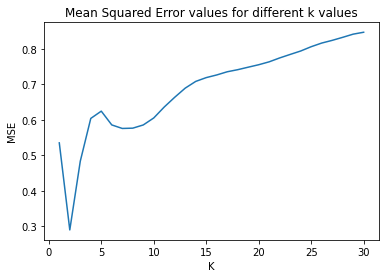

In [50]:
plt.plot(df['K'], df['MSE'])
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Mean Squared Error values for different k values')

Text(0.5, 1.0, 'Accuracy for different k values')

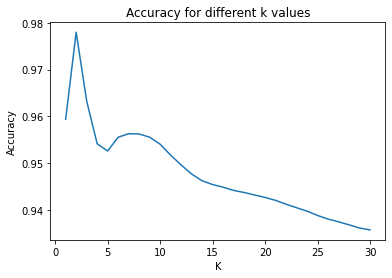

In [51]:
plt.plot(df['K'], df['test_acc'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values')

## Neural Network

In [50]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [51]:
model = Sequential()
model.add(Dense(units = 256, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 42,497
Trainable params: 42,497
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [53]:
history=model.fit(x_train, y_train, epochs=100, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(x_test)

Epoch 1/100
865/865 [==============================] - 2s 1ms/step - loss: 10.0428 - mse: 10.0428 - mae: 2.3577 - val_loss: 6.8950 - val_mse: 6.8950 - val_mae: 1.9997
Epoch 2/100
865/865 [==============================] - 1s 1ms/step - loss: 6.4329 - mse: 6.4329 - mae: 1.8747 - val_loss: 5.8643 - val_mse: 5.8643 - val_mae: 1.7692
Epoch 3/100
865/865 [==============================] - 1s 1ms/step - loss: 5.7781 - mse: 5.7781 - mae: 1.7409 - val_loss: 5.3245 - val_mse: 5.3245 - val_mae: 1.6560
Epoch 4/100
865/865 [==============================] - 1s 1ms/step - loss: 5.5101 - mse: 5.5101 - mae: 1.6849 - val_loss: 5.0853 - val_mse: 5.0853 - val_mae: 1.6220
Epoch 5/100
865/865 [==============================] - 1s 1ms/step - loss: 5.1601 - mse: 5.1601 - mae: 1.6036 - val_loss: 5.4761 - val_mse: 5.4761 - val_mae: 1.7211
Epoch 6/100
865/865 [==============================] - 1s 1ms/step - loss: 4.9961 - mse: 4.9961 - mae: 1.5664 - val_loss: 4.8988 - val_mse: 4.8988 - val_mae: 1.5725
Epoch 7/

865/865 [==============================] - 1s 1ms/step - loss: 1.1146 - mse: 1.1146 - mae: 0.6426 - val_loss: 1.0487 - val_mse: 1.0487 - val_mae: 0.6341
Epoch 100/100
865/865 [==============================] - 1s 1ms/step - loss: 1.0956 - mse: 1.0956 - mae: 0.6401 - val_loss: 1.0011 - val_mse: 1.0011 - val_mae: 0.6031


In [54]:
Neural_score = r2_score(y_test, predictions)
print("Testing Score: ", Neural_score)

mse = mean_squared_error(y_test, predictions)
print("mse value : ", mse)

Testing Score:  0.9243681554813781
mse value :  0.9834560707389479


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


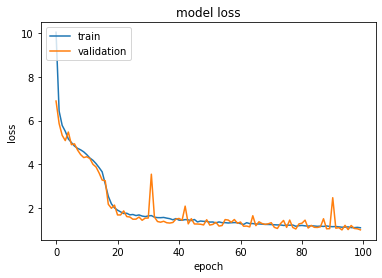

In [55]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

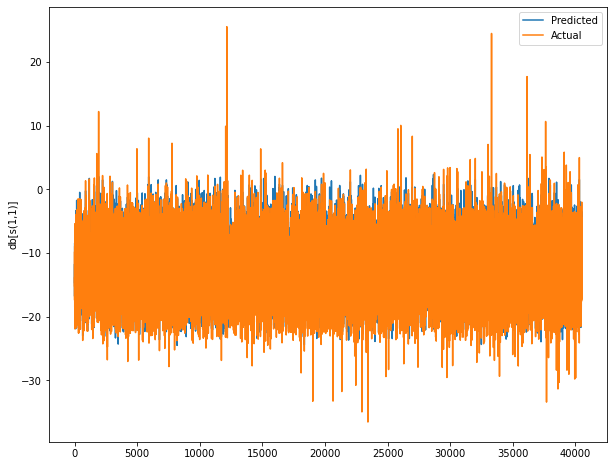

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(predictions, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel("db[s(1,1)]")
plt.legend()
plt.show()

##  Optimizing The Antenna Design Parameters

### Preparing New Datasets

In [65]:
d = pd.DataFrame(np.arange(start=0.2, stop=0.5, step=0.1),columns=['d'])
h = pd.DataFrame(np.arange(start=-3, stop=-7.1, step=-0.1),columns=['h'])
l = pd.DataFrame(np.arange(start=7, stop=10.1, step=0.1),columns=['l'])

In [66]:
d

,d
0,0.2
1,0.3
2,0.4


In [67]:
Freq = pd.read_excel('Freq.xlsx')
Freq

,Freq
0,2.9000
1,2.9935
2,3.0870
3,3.1805
4,3.2740
...,...
196,21.2260
197,21.3195
198,21.4130
199,21.5065


### Merging d and l column

In [68]:
d['tmp'] = 1
h['tmp'] = 1

new_dataset = pd.merge(d, h, on=['tmp'])
new_dataset = new_dataset.drop('tmp', axis=1)
new_dataset

,d,h
0,0.2,-3.0
1,0.2,-3.1
2,0.2,-3.2
3,0.2,-3.3
4,0.2,-3.4
...,...,...
118,0.4,-6.6
119,0.4,-6.7
120,0.4,-6.8
121,0.4,-6.9


In [69]:
new_dataset['tmp'] = 1
l['tmp'] = 1

new_dataset = pd.merge(new_dataset, l, on=['tmp'])
new_dataset = new_dataset.drop('tmp', axis=1)
new_dataset

,d,h,l
0,0.2,-3.0,7.0
1,0.2,-3.0,7.1
2,0.2,-3.0,7.2
3,0.2,-3.0,7.3
4,0.2,-3.0,7.4
...,...,...,...
3808,0.4,-7.0,9.6
3809,0.4,-7.0,9.7
3810,0.4,-7.0,9.8
3811,0.4,-7.0,9.9


### New Dataset

In [70]:
new_dataset['tmp'] = 1
Freq['tmp'] = 1

new_dataset = pd.merge(new_dataset, Freq, on=['tmp'])
new_dataset = new_dataset.drop('tmp', axis=1)
new_dataset

,d,h,l,Freq
0,0.2,-3.0,7.0,2.9000
1,0.2,-3.0,7.0,2.9935
2,0.2,-3.0,7.0,3.0870
3,0.2,-3.0,7.0,3.1805
4,0.2,-3.0,7.0,3.2740
...,...,...,...,...
766408,0.4,-7.0,10.0,21.2260
766409,0.4,-7.0,10.0,21.3195
766410,0.4,-7.0,10.0,21.4130
766411,0.4,-7.0,10.0,21.5065


### Predict The Value Using The Best Model

#### Best Model :- KNeighborsRegressor(n_neighbors = 2)
With Testing Score :-  0.9779866048795093
And Mean Squared Error :- 0.28978639754122787

In [71]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train ,y_train)
accuracies = r2_score(y_test, knn.predict(x_test))
mse = mean_squared_error(y_test,  knn.predict(x_test))

In [72]:
print("Accuracies = ",accuracies)
print("Mean Squared Error = ",mse)

Accuracies =  0.9779866048795093
Mean Squared Error =  0.28978639754122787


In [73]:
y_pred = knn.predict(new_dataset)
y_pred

array([-3.99980699, -3.99980699, -5.32225911, ..., -9.90012273,
       -9.81349834, -9.78515475])

In [74]:
y_pred = pd.DataFrame(y_pred,columns=['dB'])
y_pred

,dB
0,-3.999807
1,-3.999807
2,-5.322259
3,-5.322259
4,-6.413053
...,...
766408,-10.248197
766409,-9.900123
766410,-9.900123
766411,-9.813498


In [75]:
dataset_with_predict = new_dataset.join(y_pred)
dataset_with_predict

,d,h,l,Freq,dB
0,0.2,-3.0,7.0,2.9000,-3.999807
1,0.2,-3.0,7.0,2.9935,-3.999807
2,0.2,-3.0,7.0,3.0870,-5.322259
3,0.2,-3.0,7.0,3.1805,-5.322259
4,0.2,-3.0,7.0,3.2740,-6.413053
...,...,...,...,...,...
766408,0.4,-7.0,10.0,21.2260,-10.248197
766409,0.4,-7.0,10.0,21.3195,-9.900123
766410,0.4,-7.0,10.0,21.4130,-9.900123
766411,0.4,-7.0,10.0,21.5065,-9.813498


### Visulize the data

<AxesSubplot:xlabel='Freq', ylabel='dB'>

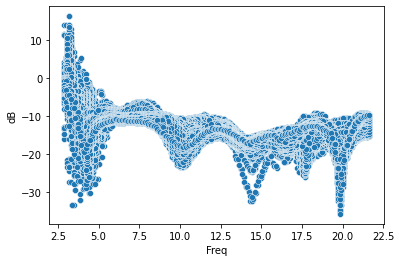

In [76]:
plt.scatter(x = 'Freq', y = 'dB', data = dataset_with_predict)
plt.xlabel('Frequency')
plt.ylabel('dB')

### Best Parameter

In [77]:
np.min(y_pred['dB'])

-35.77640827992235

In [78]:
# index pf min value
np.argmin(y_pred['dB'])

479767

In [81]:
y_pred['dB'][479767]

-35.77640827992235

In [82]:
# best parameter
new_dataset.loc[[479767]]

,d,h,l,Freq
479767,0.3,-6.5,10.0,19.8235
